In [5]:
from shapely import LineString,Point, BufferCapStyle, BufferJoinStyle,MultiPoint, Point
import matplotlib.pyplot as plt
import geopandas as gpd


def show(e):
    p = gpd.GeoSeries(e)
    p.plot()
    plt.show(block=False)

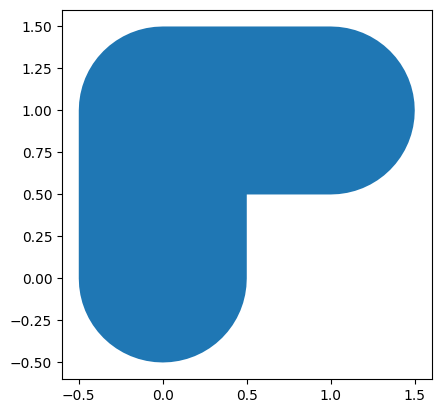

In [2]:
l = LineString([(0, 0), (0, 1), (1, 1)])

a = l.buffer(0.5, cap_style=BufferCapStyle.round, join_style=BufferJoinStyle.round)

show(a)

In [3]:
c=Point(0,0).buffer(5).boundary
l = LineString([Point(-10,-10),Point(0,0),Point(2,2), Point(10,10)])
print(MultiPoint(c.intersection(l)).geoms[0])

POINT (3.5355339059327378 3.5355339059327378)


In [4]:
from typing import Any, ClassVar, Dict, Tuple

# Example from https://github.com/shapely/shapely/issues/1233
class PropertyPoint(Point):

    _id_to_attrs: ClassVar[Dict[str, Any]] = {}

    __slots__ = Point.__slots__  # slots must be the same for assigning __class__ - https://stackoverflow.com/a/52140968

    name: str  # For documentation generation and static type checking

    def __init__(self, coord: Tuple[float, float], name: str) -> None:
        self._id_to_attrs[id(self)] = dict(name=name)

    def __new__(cls, coord: Tuple[float, float], *args, **kwargs) -> "PropertyPoint":
        point = super().__new__(cls, coord)
        point.__class__ = cls
        return point

    def __del__(self) -> None:
        del self._id_to_attrs[id(self)]

    def __getattr__(self, name: str) -> Any:
        try:
            return PropertyPoint._id_to_attrs[id(self)][name]
        except KeyError as e:
            raise AttributeError(str(e)) from None

    def __str__(self) -> str:
        return f"{self.name}, {self.wkt}"


In [5]:
class OrientedPoint1(Point):

    _id_to_attrs: ClassVar[Dict[str, Any]] = {}

    __slots__ = (
        Point.__slots__
    )  # slots must be the same for assigning __class__ - https://stackoverflow.com/a/52140968

    theta: float  # For documentation generation and static type checking

    def __init__(
        self, coord: Tuple[float, float], theta: float = 0.0
    ) -> (
        None
    ):  # if theta is not optional or if the structure of the arguments change (eg: self, x, y, theta) then MultiPoint becomes impossible with OrientedPoint
        self._id_to_attrs[id(self)] = dict(theta=theta)

    def __new__(cls, coord: Tuple[float, float], *args, **kwargs) -> "OrientedPoint1":
        point = super().__new__(cls, coord)
        point.__class__ = cls
        return point

    def __del__(self) -> None:
        del self._id_to_attrs[id(self)]

    def __getattr__(self, name: str) -> Any:
        try:
            return OrientedPoint1._id_to_attrs[id(self)][name]
        except KeyError as e:
            raise AttributeError(str(e)) from None

    def __str__(self) -> str:
        return f"{self.wkt}, theta: {self.theta}"


In [6]:

class OrientedPoint2(Point):

    _id_to_attrs: ClassVar[Dict[str, Any]] = {}

    __slots__ = (
        Point.__slots__
    )  # slots must be the same for assigning __class__ - https://stackoverflow.com/a/52140968

    theta: float  # For documentation generation and static type checking

    def __init__(
        self, coord: Tuple[float, float], theta: float = 0.0
    ) -> (
        None
    ):  # if theta is not optional or if the structure of the arguments change (eg: self, x, y, theta) then MultiPoint becomes impossible with OrientedPoint
        self._id_to_attrs[str(id(self))] = dict(theta=theta)

    def __new__(cls, coord: Tuple[float, float], *args, **kwargs) -> "OrientedPoint2":
        point = super().__new__(cls, coord)
        point.__class__ = cls
        return point

    def __del__(self) -> None:
        del self._id_to_attrs[str(id(self))]

    def __getattr__(self, name: str) -> Any:
        try:
            return OrientedPoint2._id_to_attrs[str(id(self))][name]
        except KeyError as e:
            raise AttributeError(str(e)) from None

    def __str__(self) -> str:
        return f"{self.wkt}, theta: {self.theta}"


In [7]:

class OrientedPoint3(Point):

    _id_to_attrs: ClassVar[Dict[str, Any]] = {}

    __slots__ = (
        Point.__slots__
    )  # slots must be the same for assigning __class__ - https://stackoverflow.com/a/52140968

    theta: float  # For documentation generation and static type checking

    def __init__(
        self,x:float|Tuple[float, float],y:float|None=None, theta: float = 0.0
    ) -> (
        None
    ):  # if theta is not optional or if the structure of the arguments change (eg: self, x, y, theta) then MultiPoint becomes impossible with OrientedPoint
        self._id_to_attrs[id(self)] = dict(theta=(theta if not isinstance(x,Tuple) else y))

    def __new__(cls, x:float|Tuple[float, float],y:float|None=None, *args, **kwargs) -> "OrientedPoint3":
        if isinstance(x,Tuple):
            point = super().__new__(cls, x)
        else:
            point = super().__new__(cls, x,y)

        point.__class__ = cls
        return point

    def __del__(self) -> None:
        del self._id_to_attrs[id(self)]

    def __getattr__(self, name: str) -> Any:
        try:
            return OrientedPoint3._id_to_attrs[id(self)][name]
        except KeyError as e:
            raise AttributeError(str(e)) from None

    def __str__(self) -> str:
        return f"{self.wkt}, theta: {self.theta}"

    @classmethod
    def from_Point(cls, point: Point, theta: float = 0.0):
        return cls((point.x, point.y), theta)


In [8]:

class OrientedPoint4(Point):

    _id_to_attrs: ClassVar[Dict[str, Any]] = {}

    __slots__ = (
        Point.__slots__
    )  # slots must be the same for assigning __class__ - https://stackoverflow.com/a/52140968

    theta: float  # For documentation generation and static type checking

    def __init__(
        self,x_or_coords:float|Tuple[float, float],y:float|None=None, theta: float = 0.0
    ) -> (
        None
    ):  # if theta is not optional or if the structure of the arguments change (eg: self, x, y, theta) then MultiPoint becomes impossible with OrientedPoint
        self._id_to_attrs[str(id(self))] = dict(theta=(theta if not isinstance(x_or_coords,Tuple) else (0.0 if y is None else y)))

    def __new__(cls, x_or_coords:float|Tuple[float, float],y:float|None=None, *args, **kwargs) -> "OrientedPoint4":
        if isinstance(x_or_coords,Tuple):
            point = super().__new__(cls, x_or_coords)
        else:
            point = super().__new__(cls, x_or_coords,y)

        point.__class__ = cls
        return point

    def __del__(self) -> None:
        del self._id_to_attrs[str(id(self))]

    def __getattr__(self, name: str) -> Any:
        try:
            return OrientedPoint4._id_to_attrs[str(id(self))][name]
        except KeyError as e:
            raise AttributeError(str(e)) from None

    def __str__(self) -> str:
        return f"{self.wkt}, theta: {self.theta}"

    @classmethod
    def from_Point(cls, point: Point, theta: float = 0.0):
        return cls((point.x, point.y), theta)


In [9]:
from shapely.ops import nearest_points
from shapely import Polygon

demo = PropertyPoint((1,2),"demo")
p1 = OrientedPoint3((1,2),10)

p2 = Point(5,6)
p3 = Point(5,7)
pFrom = OrientedPoint3.from_Point(p3)
print(demo)
print(demo.name)
print(p1)

print(p1.x, p1.y, p1.theta)

poly = Polygon([[-10,-10],[-10,10],[10,10],[10,-10]])
print(poly.contains(p2))
print(poly.contains(p1))
print(nearest_points(p1, MultiPoint([p2,p3])))


demo, POINT (1 2)
demo
POINT (1 2), theta: 10
1.0 2.0 10
True
True
(<POINT (1 2)>, <POINT (5 6)>)


In [10]:
# MultiPoint (needs theta optional in constructor, because it re-constructs its elements; for example, doesn't work with the example class):
p1copy = Point(p1)
coll = MultiPoint([p1,p2])
print(coll.geoms[0])
print(coll.geoms[1])

print(coll)


POINT (1 2)
POINT (5 6)
MULTIPOINT (1 2, 5 6)


In [11]:
for PointType in [OrientedPoint1,OrientedPoint2,OrientedPoint3, OrientedPoint4]:
    try:
        # Using tuples coords
        p1 = PointType((1,2),3)
        assert p1.x == 1 and p1.y==2 and p1.theta==3, "Tuple with explicit theta"
        p1coll = MultiPoint([p1,p1])
        p1 = PointType((1,2))
        assert p1.x == 1 and p1.y==2 and p1.theta==0, f"Tuple with default theta: theta={p1.theta}"
        p1coll = MultiPoint([p1,p1])
        print("Tuple ok")

        # Using x,y coords
        p2 = PointType(4,5,6)
        assert p2.x == 4 and p2.y==5 and p2.theta==6, "Separate with explicit theta"
        p2coll = MultiPoint([p2,p2])
        p2 = PointType(4,5)
        assert p2.x == 4 and p2.y==5 and p2.theta==0, "Separate with default theta"
        p2coll = MultiPoint([p2,p2])
        print("x,y ok")

        assert nearest_points(p1coll,p2coll)[0].distance(p2)==p2.distance(p1)
        print("Operations ok")

        print(f"{PointType.__name__} fully valid!")

    except Exception as e:
        print(f"{PointType.__name__} not fully valid: {e}")

Tuple ok
OrientedPoint1 not fully valid: 'int' object is not iterable
Tuple ok
OrientedPoint2 not fully valid: 'int' object is not iterable
OrientedPoint3 not fully valid: Tuple with default theta: theta=None
Tuple ok
x,y ok
Operations ok
OrientedPoint4 fully valid!


In [12]:
# The version with explicit conversion to string for dict keys (which solves an ide warning) is a bit slower •`_´•
# The version that supports both (x,y),theta and x,y,theta parameters is also a bit slower

import timeit

setup_base = "from __main__ import Point as PointType"
setup = "from __main__ import OrientedPoint1 as PointType"
setup2 = "from __main__ import OrientedPoint2 as PointType"
setup3 = "from __main__ import OrientedPoint3 as PointType"
setup4 = "from __main__ import OrientedPoint4 as PointType"
statement_base = "p=PointType((13.24,2.5421))"
statement_tuple = "p=PointType((13.24,2.5421), 10.0)"
statement_xy = "p=PointType((13.24,2.5421), 10.0)"
print(timeit.timeit(stmt=statement_base, setup=setup_base, number=10000000))
print(timeit.timeit(stmt=statement_tuple, setup=setup, number=10000000))
print(timeit.timeit(stmt=statement_tuple, setup=setup2, number=10000000))
print(timeit.timeit(stmt=statement_tuple, setup=setup3, number=10000000))
print(timeit.timeit(stmt=statement_xy, setup=setup3, number=10000000))
print(timeit.timeit(stmt=statement_tuple, setup=setup4, number=10000000))

KeyboardInterrupt: 

46.891653434888276
(<POINT (22.5 22.5)>, <POINT (157.277 19.426)>)


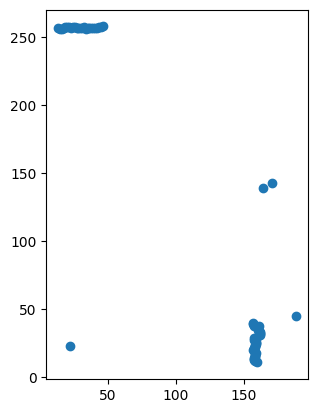

In [9]:
from shapely import Point, MultiPoint, distance
from shapely.ops import nearest_points
import numpy as np

string_coords = "13.424459693867728 257.01956872493804, 14.827321578759515 255.86968175649494, 16.186223464174933 255.81102437893946, 17.52897497587153 256.4442589160417, 18.87406616141989 257.36974132595793, 20.23886296656252 257.38749760810504, 21.60416921957222 257.2973333986064, 22.968044075905844 256.9992246987918, 24.33281716115229 257.2931938237541, 25.69836270159952 257.3792154403951, 27.053625800985746 256.8574234204459, 28.412831435875795 256.72766961318956, 29.782906078870866 256.98987380345113, 31.152558473656477 257.14413062543076, 32.520054546998196 257.1904473457041, 33.84519308492341 256.32984915422577, 35.230587168993765 256.7598929695948, 36.60941281440777 256.9820902169686, 37.98473590478194 257.0963844706447, 39.354739464896255 257.10283837200245, 40.702243015247184 256.8021757314805, 42.096455722845036 257.0917612071748, 43.494668611972806 257.37300876580633, 44.87793623370207 257.44679453753906, 46.30281981256195 257.91044255175814, 156.7008289177808 39.00013405335141, 157.27720737739202 19.425563562585776, 157.29695034491445 39.868517056619595, 157.4927633028413 20.20469156290653, 157.687216608284 13.122800326978162, 157.68833790874334 38.32545825217683, 157.72813885876306 27.268813959003783, 157.73017662964955 12.330593021255627, 157.83922475682397 13.901473747430645, 157.90380447326538 20.98398052932634, 157.97678537288968 37.56244268634771, 158.06314523965352 28.857416947008616, 158.10965952639998 23.343708157027624, 158.12973834815693 15.463145348778964, 158.15669777195004 18.617370910688322, 158.16717221637626 11.505234576501438, 158.3103146248396 21.76796900708015, 158.35331583464196 26.50131652788416, 158.4122805138256 22.556504553535557, 158.46802052954595 16.236881115906066, 158.50211637741006 17.02638466401981, 158.59737958136404 28.09080603646491, 158.78539807747936 14.635474213645471, 158.93138083290523 17.802298187130788, 159.0023954374202 24.14184588348682, 159.07407814911383 25.72907954578369, 159.29050525037255 24.93967599191458, 160.0934820597973 10.544509285615133, 160.8200290565531 29.791889050272157, 160.88033305071423 34.63988005356609, 160.9289276955246 36.265669713760545, 161.00658184424444 35.46174076242502, 161.1449540591741 37.10057946447258, 161.5465426730488 33.88526760183956, 161.76921916758977 32.276963839127085, 161.77362613928784 30.653322942746634, 162.22286418922675 31.493935985186972, 162.40803605759686 33.13849679715802, 164.6713081750205 138.8102499925945, 171.25305657267415 142.76320967842207, 188.70841320699708 44.90127376156623"


coords = [[float(val) for val in point.split(" ")] for point in string_coords.split(", ")]

m1 = Point([22.5,22.5])
m2 = MultiPoint(coords)

print(np.std([distance(m1,geom) for geom in m2.geoms]))

print(nearest_points(m1,m2))

show([m1,m2])

In [7]:
import numpy as np
from shapely import MultiPoint

def pol_to_abs_cart(polars: np.ndarray):
	return MultiPoint(
		[
			(
				(
					25
					+ np.cos(0 + polars[i, 0])
					* polars[i, 1]
				),
				25
				+ np.sin(0 + polars[i, 0])
				* polars[i, 1],
			)
			for i in range(len(polars))
		]
        )

print(pol_to_abs_cart((np.asarray([[-2.3155202865600586, 611.7999877929688], [-2.3038992881774902, 521.4000244140625], [-2.298088550567627, 474.3999938964844], [-2.2922780513763428, 462.3000183105469], [-2.2864673137664795, 443.6999816894531], [-2.2806568145751953, 407.8000183105469], [-2.274846315383911, 389.5999755859375], [-2.269035577774048, 373.0], [-2.2632250785827637, 355.5], [-2.2574143409729004, 346.3999938964844], [-2.251603841781616, 339.1000061035156], [-2.245793342590332, 336.1000061035156], [-2.2399826049804688, 163.39999389648438], [-2.2341721057891846, 147.1999969482422], [-2.2283616065979004, 293.70001220703125], [-2.222550868988037, 283.5], [-2.216740369796753, 274.5], [-2.2051191329956055, 254.09999084472656], [-2.1993086338043213, 245.79998779296875], [-2.193497896194458, 235.99998474121094], [-2.187687397003174, 76.9000015258789], [-2.1818768978118896, 234.29998779296875], [-2.1760661602020264, 234.89999389648438], [-2.170255661010742, 238.70001220703125], [-2.164444923400879, 81.9000015258789], [-2.1586344242095947, 232.0], [-2.1528239250183105, 199.8000030517578], [-2.1470131874084473, 198.59999084472656], [-2.141202688217163, 198.89999389648438], [-2.1353919506073, 198.89999389648438], [-2.1295814514160156, 204.09999084472656], [-2.1237709522247314, 223.49998474121094], [-2.117960214614868, 221.60000610351562], [-2.112149715423584, 218.5], [-2.1063392162323, 215.8000030517578], [-2.1005284786224365, 209.40000915527344], [-2.0947179794311523, 207.6999969482422], [-2.088907241821289, 210.5], [-2.083096742630005, 211.29998779296875], [-2.0772862434387207, 211.70001220703125], [-2.0714755058288574, 212.1999969482422], [-2.0656650066375732, 213.70001220703125], [-2.05985426902771, 216.1999969482422], [-2.054043769836426, 215.59999084472656], [-2.0482332706451416, 212.89999389648438], [-2.0424225330352783, 210.59999084472656], [-2.036612033843994, 211.10000610351562], [-2.03080153465271, 212.59999084472656], [-2.0249907970428467, 212.89999389648438], [-2.0191802978515625, 214.10000610351562], [-2.013369560241699, 216.59999084472656], [-2.007559061050415, 219.79998779296875], [-2.001748561859131, 221.09999084472656], [-1.9959378242492676, 221.79998779296875], [-1.9901273250579834, 572.7999877929688], [-1.9843167066574097, 118.49999237060547], [-1.978506088256836, 117.79999542236328], [-1.9726954698562622, 117.99999237060547], [-1.966884970664978, 117.79999542236328], [-1.9610743522644043, 119.0999984741211], [-1.9552637338638306, 120.79999542236328], [-1.9494531154632568, 121.4000015258789], [-1.9436426162719727, 121.5999984741211], [-1.937831997871399, 120.9000015258789], [-1.9320213794708252, 118.29999542236328], [-1.9262107610702515, 118.70000457763672], [-1.9204002618789673, 119.0999984741211], [-1.9145896434783936, 118.20000457763672], [-1.9087790250778198, 117.5999984741211], [-1.902968406677246, 117.0999984741211], [-1.8971577882766724, 117.49999237060547], [-1.8913472890853882, 117.0999984741211], [-1.8855366706848145, 116.19999694824219], [-1.8797260522842407, 115.69999694824219], [-1.873915433883667, 115.4000015258789], [-1.8681049346923828, 114.80000305175781], [-1.862294316291809, 114.30000305175781], [-1.8564836978912354, 114.19999694824219], [-1.8506730794906616, 114.69999694824219], [-1.8448625802993774, 113.80000305175781], [-1.8390519618988037, 113.69999694824219], [-1.83324134349823, 112.69999694824219], [-1.8274307250976562, 112.69999694824219], [-1.8216201066970825, 112.19999694824219], [-1.8158096075057983, 112.0], [-1.8099989891052246, 111.60000610351562], [-1.8041883707046509, 112.10000610351562], [-1.7983777523040771, 111.5], [-1.792567253112793, 111.19999694824219], [-1.7867566347122192, 110.19999694824219], [-1.7809460163116455, 109.80000305175781], [-1.7751353979110718, 111.19999694824219], [-1.7693248987197876, 110.30000305175781], [-1.7635142803192139, 109.4000015258789], [-1.7577036619186401, 109.80000305175781], [-1.7518930435180664, 108.29999542236328], [-1.7460824251174927, 108.80000305175781], [-1.7402719259262085, 108.0999984741211], [-1.7344613075256348, 109.0], [-1.728650689125061, 109.19999694824219], [-1.7228400707244873, 107.70000457763672], [-1.7170295715332031, 108.20000457763672], [-1.7112189531326294, 108.00000762939453], [-1.7054083347320557, 106.50000762939453], [-1.699597716331482, 107.29999542236328], [-1.6937872171401978, 107.70000457763672], [-1.687976598739624, 106.9000015258789], [-1.6821659803390503, 105.99999237060547], [-1.6763553619384766, 106.9000015258789], [-1.6705448627471924, 107.00000762939453], [-1.6647342443466187, 106.20000457763672], [-1.658923625946045, 105.99999237060547], [-1.6531130075454712, 106.20000457763672], [-1.6473023891448975, 105.29999542236328], [-1.6414918899536133, 105.79999542236328], [-1.6356812715530396, 105.5999984741211], [-1.6298706531524658, 106.29999542236328], [-1.624060034751892, 105.9000015258789], [-1.618249535560608, 104.5999984741211], [-1.6124389171600342, 105.49999237060547], [-1.6066282987594604, 104.29999542236328], [-1.6008176803588867, 105.29999542236328], [-1.5950071811676025, 104.5999984741211], [-1.5891965627670288, 104.29999542236328], [-1.583385944366455, 104.79999542236328], [-1.5775753259658813, 104.20000457763672], [-1.5717647075653076, 104.70000457763672], [-1.5659542083740234, 104.4000015258789], [-1.5601435899734497, 104.49999237060547], [-1.554332971572876, 103.4000015258789], [-1.5485223531723022, 103.9000015258789], [-1.542711853981018, 104.0], [-1.5369012355804443, 103.19999694824219], [-1.5310906171798706, 103.0999984741211], [-1.5252799987792969, 103.9000015258789], [-1.5194694995880127, 103.5], [-1.513658881187439, 103.5999984741211], [-1.5078482627868652, 102.69999694824219], [-1.5020376443862915, 103.30000305175781], [-1.4962271451950073, 102.60000610351562], [-1.4904165267944336, 102.5], [-1.4846059083938599, 102.9000015258789], [-1.4787952899932861, 102.19999694824219], [-1.4729846715927124, 103.0999984741211], [-1.4671741724014282, 102.5], [-1.4613635540008545, 102.5], [-1.4555529356002808, 103.0999984741211], [-1.449742317199707, 102.60000610351562], [-1.4439318180084229, 102.30000305175781], [-1.4381211996078491, 102.4000015258789], [-1.4323105812072754, 102.5], [-1.4264999628067017, 102.80000305175781], [-1.4206894636154175, 102.19999694824219], [-1.4148788452148438, 103.0], [-1.40906822681427, 103.30000305175781], [-1.4032576084136963, 102.60000610351562], [-1.3974469900131226, 102.4000015258789], [-1.3916364908218384, 102.80000305175781], [-1.3858258724212646, 102.60000610351562], [-1.380015254020691, 102.9000015258789], [-1.3742046356201172, 102.4000015258789], [-1.368394136428833, 102.19999694824219], [-1.3625835180282593, 102.80000305175781], [-1.3567728996276855, 102.4000015258789], [-1.3509622812271118, 102.69999694824219], [-1.3451517820358276, 102.0], [-1.339341163635254, 103.0], [-1.3335305452346802, 103.0], [-1.3277199268341064, 102.19999694824219], [-1.3219094276428223, 102.0], [-1.3160988092422485, 102.9000015258789], [-1.3102881908416748, 103.4000015258789], [-1.304477572441101, 103.0], [-1.2986669540405273, 103.19999694824219], [-1.2928564548492432, 102.9000015258789], [-1.2870458364486694, 103.0], [-1.2812352180480957, 103.0999984741211], [-1.275424599647522, 103.19999694824219], [-1.2696141004562378, 102.9000015258789], [-1.263803482055664, 103.4000015258789], [-1.2579928636550903, 103.0], [-1.2521822452545166, 103.30000305175781], [-1.2463717460632324, 104.20000457763672], [-1.2405611276626587, 103.0], [-1.234750509262085, 103.4000015258789], [-1.2289398908615112, 103.79999542236328], [-1.2231292724609375, 104.29999542236328], [-1.2173187732696533, 104.4000015258789], [-1.2115081548690796, 104.49999237060547], [-1.2056975364685059, 104.70000457763672], [-1.1998869180679321, 104.70000457763672], [-1.194076418876648, 103.5999984741211], [-1.1882658004760742, 104.99999237060547], [-1.1824551820755005, 105.0999984741211], [-1.1766445636749268, 104.79999542236328], [-1.1708340644836426, 105.29999542236328], [-1.1650234460830688, 104.9000015258789], [-1.1592128276824951, 105.5999984741211], [-1.1534022092819214, 105.29999542236328], [-1.1475915908813477, 105.4000015258789], [-1.1417810916900635, 106.29999542236328], [-1.1359704732894897, 106.20000457763672], [-1.130159854888916, 106.70000457763672], [-1.1243492364883423, 105.5999984741211], [-1.118538737297058, 106.0999984741211], [-1.1127281188964844, 106.79999542236328], [-1.1069175004959106, 106.5999984741211], [-1.101106882095337, 107.00000762939453], [-1.0952963829040527, 106.9000015258789], [-1.089485764503479, 106.5999984741211], [-1.0836751461029053, 107.70000457763672], [-1.0778645277023315, 107.0999984741211], [-1.0720540285110474, 108.20000457763672], [-1.0662434101104736, 109.0], [-1.0604327917099, 108.0999984741211], [-1.0546221733093262, 108.29999542236328], [-1.0488115549087524, 108.9000015258789], [-1.0430010557174683, 109.19999694824219], [-1.0371904373168945, 108.9000015258789], [-1.0313798189163208, 109.30000305175781], [-1.025569200515747, 110.0], [-1.019758701324463, 110.0], [-1.0139480829238892, 110.5], [-1.0081374645233154, 110.39999389648438], [-1.0023268461227417, 110.69999694824219], [-0.9965162873268127, 111.30000305175781], [-0.9907057285308838, 111.09999084472656], [-0.9848951101303101, 112.69999694824219], [-0.9790844917297363, 112.0], [-0.9732739329338074, 112.39999389648438], [-0.9674633145332336, 112.5], [-0.9616527557373047, 112.60000610351562], [-0.955842137336731, 112.69999694824219], [-0.950031578540802, 113.30000305175781], [-0.9442209601402283, 114.30000305175781], [-0.9384104013442993, 114.5], [-0.9325997829437256, 114.80000305175781], [-0.9267892241477966, 114.30000305175781], [-0.9209786057472229, 115.10000610351562], [-0.915168046951294, 115.5999984741211], [-0.9093574285507202, 115.5999984741211], [-0.9035468697547913, 116.5999984741211], [-0.8977362513542175, 115.80000305175781], [-0.8919256329536438, 116.5999984741211], [-0.8861150741577148, 116.4000015258789], [-0.8803044557571411, 117.49999237060547], [-0.8744938969612122, 117.99999237060547], [-0.8686832785606384, 118.29999542236328], [-0.8628727197647095, 118.5999984741211], [-0.8570621013641357, 119.79999542236328], [-0.8512515425682068, 120.0999984741211], [-0.8454409241676331, 120.29999542236328], [-0.8396303653717041, 120.20000457763672], [-0.8338197469711304, 121.4000015258789], [-0.8280091881752014, 122.30000305175781], [-0.8221985697746277, 122.5], [-0.8163880109786987, 122.80000305175781], [-0.810577392578125, 122.89999389648438], [-0.8047667741775513, 124.10000610351562], [-0.7989562153816223, 125.0], [-0.7931455969810486, 124.80000305175781], [-0.7873350381851196, 125.5], [-0.7815244197845459, 125.39999389648438], [-0.7757138609886169, 126.10000610351562], [-0.7699032425880432, 126.60000610351562], [-0.7640926837921143, 128.1999969482422], [-0.7582820653915405, 128.0], [-0.7524715065956116, 129.0], [-0.7466608881950378, 128.40000915527344], [-0.7408503293991089, 130.20001220703125], [-0.7350397109985352, 130.40000915527344], [-0.7292291522026062, 131.0], [-0.7234185338020325, 131.8000030517578], [-0.7176079154014587, 131.6999969482422], [-0.7117973566055298, 133.1999969482422], [-0.705986738204956, 133.5], [-0.7001761794090271, 134.0], [-0.6943655610084534, 134.89999389648438], [-0.6885550022125244, 135.0], [-0.6827443838119507, 135.39999389648438], [-0.6769338250160217, 136.6999969482422], [-0.671123206615448, 137.3000030517578], [-0.665312647819519, 138.3000030517578], [-0.6595020294189453, 139.0], [-0.6536914706230164, 141.0], [-0.6478808522224426, 140.8000030517578], [-0.6420702934265137, 141.8000030517578], [-0.6362596750259399, 142.20001220703125], [-0.6304490566253662, 143.6999969482422], [-0.6246384978294373, 144.10000610351562], [-0.6188278794288635, 144.6999969482422], [-0.6130173206329346, 145.6999969482422], [-0.6072067022323608, 147.3000030517578], [-0.6013961434364319, 148.1999969482422], [-0.5955855250358582, 148.59999084472656], [-0.5897749662399292, 149.60000610351562], [-0.5839643478393555, 150.6999969482422], [-0.5781537890434265, 151.6999969482422], [-0.5723431706428528, 152.1999969482422], [-0.5665326118469238, 153.0], [-0.5607219934463501, 154.40000915527344], [-0.5549114346504211, 155.20001220703125], [-0.5491008162498474, 156.5], [-0.5432901978492737, 157.39999389648438], [-0.5374796390533447, 158.6999969482422], [-0.531669020652771, 159.8000030517578], [-0.525858461856842, 160.3000030517578], [-0.5200478434562683, 162.5], [-0.5142372846603394, 163.3000030517578], [-0.5084266662597656, 165.10000610351562], [-0.5026161074638367, 165.8000030517578], [-0.49680548906326294, 167.20001220703125], [-0.4909949004650116, 168.1999969482422], [-0.48518431186676025, 169.89999389648438], [-0.4793737232685089, 171.3000030517578], [-0.47356313467025757, 172.5], [-0.4677525460720062, 175.39999389648438], [-0.4619419574737549, 175.8000030517578], [-0.45613136887550354, 174.89999389648438], [-0.4503207802772522, 174.10000610351562], [-0.44451019167900085, 174.1999969482422], [-0.4386996030807495, 173.8000030517578], [-0.43288901448249817, 174.6999969482422], [-0.34573015570640564, 285.6000061035156], [-0.3399195373058319, 283.6999816894531], [-0.33410894870758057, 280.8999938964844], [-0.3282983601093292, 277.6000061035156], [-0.3224877715110779, 275.0], [-0.31667718291282654, 272.70001220703125], [-0.3108665943145752, 269.8999938964844], [-0.30505600571632385, 267.70001220703125], [-0.2992454171180725, 264.79998779296875], [-0.29343482851982117, 262.0], [-0.2876242399215698, 259.5], [-0.2818136513233185, 257.0], [-0.27600306272506714, 254.39999389648438], [-0.2701924741268158, 252.20001220703125], [-0.26438188552856445, 252.0], [-0.2585712969303131, 252.80001831054688], [-0.2527606785297394, 253.50001525878906], [-0.24695010483264923, 254.5], [-0.2411395162343979, 255.39999389648438], [-0.23532892763614655, 256.5], [-0.229518324136734, 258.20001220703125], [-0.22370773553848267, 259.29998779296875], [-0.21789714694023132, 259.6999816894531], [-0.21208655834197998, 260.8000183105469], [-0.20627596974372864, 262.20001220703125], [-0.2004653811454773, 118.70000457763672], [-0.19465479254722595, 137.89999389648438], [-0.18884418904781342, 137.8000030517578], [-0.18303360044956207, 137.6999969482422], [-0.17722301185131073, 136.8000030517578], [-0.1714124232530594, 137.6999969482422], [-0.16560183465480804, 138.0], [-0.1597912460565567, 137.5], [-0.15398065745830536, 139.3000030517578], [-0.14817005395889282, 137.89999389648438], [-0.14235946536064148, 138.39999389648438], [-0.13654887676239014, 137.89999389648438], [-0.1307382881641388, 136.6999969482422], [-0.12492769956588745, 136.8000030517578], [-0.11911711096763611, 136.89999389648438], [-0.11330651491880417, 137.0], [-0.10749592632055283, 136.89999389648438], [-0.10168533772230148, 138.6999969482422], [-0.09587474167346954, 138.5], [-0.0900641530752182, 138.3000030517578], [-0.08425356447696686, 137.89999389648438], [-0.07844297587871552, 138.0], [-0.07263237982988358, 136.0], [-0.06682179123163223, 135.5], [-0.06101120263338089, 135.39999389648438], [-0.05520061030983925, 135.5], [-0.049390021711587906, 136.39999389648438], [-0.043579429388046265, 135.6999969482422], [-0.03776884078979492, 136.0], [-0.03195824846625328, 136.0], [-0.02614765800535679, 136.39999389648438], [-0.020337067544460297, 135.59999084472656], [-0.01452647615224123, 134.6999969482422], [-0.008715885691344738, 134.89999389648438], [-0.002905295230448246, 135.3000030517578], [0.002905295230448246, 135.6999969482422], [0.008715885691344738, 135.8000030517578], [0.01452647615224123, 135.5], [0.020337067544460297, 136.39999389648438], [0.02614765800535679, 136.6999969482422], [0.03195824846625328, 136.5], [0.03776884078979492, 135.8000030517578], [0.043579429388046265, 135.1999969482422], [0.049390021711587906, 136.09999084472656], [0.05520061030983925, 135.59999084472656], [0.06101120263338089, 138.39999389648438], [0.06682179123163223, 139.40000915527344], [0.07263237982988358, 139.90000915527344], [0.07844297587871552, 139.5], [0.08425356447696686, 140.1999969482422], [0.0900641530752182, 139.40000915527344], [0.09587474167346954, 138.8000030517578], [0.10168533772230148, 139.0], [0.10749592632055283, 139.0], [0.11330651491880417, 139.3000030517578], [0.11911711096763611, 136.1999969482422], [0.12492769956588745, 136.0], [0.1307382881641388, 135.09999084472656], [0.13654887676239014, 135.8000030517578], [0.14235946536064148, 167.60000610351562], [0.14817005395889282, 338.5], [0.15398065745830536, 338.5], [0.1597912460565567, 339.1999816894531], [0.16560183465480804, 339.70001220703125], [0.1714124232530594, 340.3000183105469], [0.17722301185131073, 341.0], [0.18303360044956207, 342.1000061035156], [0.18884418904781342, 343.0], [0.19465479254722595, 345.1000061035156], [0.2004653811454773, 346.0], [0.20627596974372864, 347.3000183105469], [0.21208655834197998, 350.0], [0.21789714694023132, 351.29998779296875], [0.22370773553848267, 354.8999938964844], [0.229518324136734, 357.6999816894531], [0.23532892763614655, 361.70001220703125], [0.2411395162343979, 367.1999816894531], [0.31667718291282654, 498.0], [0.3224877715110779, 495.6999816894531], [0.3282983601093292, 492.79998779296875], [0.33410894870758057, 494.0], [0.3399195373058319, 500.6000061035156], [0.41545721888542175, 542.0999755859375], [0.4212678074836731, 542.2999877929688], [0.4270784258842468, 538.3999633789062], [0.43288901448249817, 538.0], [0.44451019167900085, 555.7000122070312], [0.4503207802772522, 553.3999633789062], [0.45613136887550354, 552.2999877929688], [0.4619419574737549, 547.7000122070312], [0.4677525460720062, 546.8999633789062], [0.47356313467025757, 399.0], [0.4793737232685089, 416.0999755859375], [0.48518431186676025, 408.6000061035156], [0.4909949004650116, 399.5], [0.49680548906326294, 397.3000183105469], [0.5026161074638367, 398.79998779296875], [0.5084266662597656, 397.70001220703125], [0.5549114346504211, 403.1000061035156], [0.5607219934463501, 402.0999755859375], [0.5665326118469238, 400.0], [0.5723431706428528, 962.6000366210938], [0.5781537890434265, 469.79998779296875], [0.5839643478393555, 251.0], [0.5897749662399292, 238.5], [0.5955855250358582, 238.8000030517578], [0.6013961434364319, 465.70001220703125], [0.6072067022323608, 446.6000061035156], [0.6130173206329346, 277.0], [0.6188278794288635, 247.0], [0.6246384978294373, 225.50001525878906], [0.6304490566253662, 225.20001220703125], [0.6362596750259399, 224.60000610351562], [0.6420702934265137, 225.20001220703125], [0.6478808522224426, 226.50001525878906], [0.6536914706230164, 227.0], [0.6595020294189453, 228.80001831054688], [0.665312647819519, 232.8000030517578], [0.671123206615448, 234.59999084472656], [0.6769338250160217, 234.1999969482422], [0.6827443838119507, 218.39999389648438], [0.6885550022125244, 191.1999969482422], [0.6943655610084534, 183.59999084472656], [0.7001761794090271, 281.8999938964844], [0.705986738204956, 253.39999389648438], [0.7117973566055298, 250.90000915527344], [0.7176079154014587, 245.09999084472656], [0.7234185338020325, 247.90000915527344], [0.7292291522026062, 248.49998474121094], [0.7350397109985352, 248.09999084472656], [0.7408503293991089, 246.09999084472656], [0.7466608881950378, 247.39999389648438], [0.7524715065956116, 248.20001220703125], [0.7582820653915405, 249.79998779296875], [0.7640926837921143, 287.1000061035156], [0.7699032425880432, 312.70001220703125], [0.7757138609886169, 312.6000061035156], [0.7815244197845459, 314.5999755859375], [0.7873350381851196, 317.3000183105469], [0.7931455969810486, 319.1999816894531], [0.7989562153816223, 322.1000061035156], [0.8047667741775513, 325.3999938964844], [0.810577392578125, 350.79998779296875], [0.8163880109786987, 370.6000061035156], [0.8221985697746277, 370.3000183105469], [0.8280091881752014, 374.6000061035156], [0.8744938969612122, 358.1000061035156], [0.8803044557571411, 357.20001220703125], [0.8861150741577148, 356.0], [0.8919256329536438, 354.5], [0.8977362513542175, 353.5], [0.9035468697547913, 352.20001220703125], [0.9093574285507202, 350.8999938964844], [0.915168046951294, 349.70001220703125], [0.9209786057472229, 348.8999938964844], [0.9267892241477966, 347.3999938964844], [0.9325997829437256, 346.3000183105469], [0.9384104013442993, 344.79998779296875], [0.9442209601402283, 343.70001220703125], [0.950031578540802, 343.1000061035156], [0.955842137336731, 341.3999938964844], [0.9616527557373047, 340.3000183105469], [0.9674633145332336, 340.0], [0.9732739329338074, 338.20001220703125], [0.9790844917297363, 337.3999938964844], [0.9848951101303101, 336.1000061035156], [0.9907057285308838, 334.8999938964844], [0.9965162873268127, 334.4000244140625], [1.0023268461227417, 332.8999938964844], [1.0081374645233154, 332.20001220703125], [1.0139480829238892, 331.3999938964844], [1.019758701324463, 330.20001220703125], [1.025569200515747, 329.20001220703125], [1.0313798189163208, 328.3999938964844], [1.0371904373168945, 327.3999938964844], [1.0430010557174683, 326.5], [1.0488115549087524, 325.3999938964844], [1.0546221733093262, 324.70001220703125], [1.0604327917099, 323.8999938964844], [1.0662434101104736, 322.9000244140625], [1.0720540285110474, 322.70001220703125], [1.0778645277023315, 321.3999938964844], [1.0836751461029053, 320.5], [1.089485764503479, 319.3000183105469], [1.0952963829040527, 318.70001220703125], [1.101106882095337, 317.79998779296875], [1.1069175004959106, 317.5], [1.1127281188964844, 316.0], [1.118538737297058, 315.70001220703125], [1.1243492364883423, 314.8999938964844], [1.130159854888916, 313.79998779296875], [1.1359704732894897, 314.5], [1.1417810916900635, 312.20001220703125], [1.1475915908813477, 311.6000061035156], [1.1534022092819214, 311.3999938964844], [1.1592128276824951, 310.29998779296875], [1.1650234460830688, 309.8000183105469], [1.1708340644836426, 309.4000244140625], [1.1766445636749268, 308.6000061035156], [1.1824551820755005, 307.8999938964844], [1.1882658004760742, 307.1000061035156], [1.194076418876648, 306.3999938964844], [1.1998869180679321, 305.8999938964844], [1.2056975364685059, 304.8000183105469], [1.2115081548690796, 304.3999938964844], [1.2173187732696533, 304.5], [1.2231292724609375, 303.29998779296875], [1.2289398908615112, 302.8999938964844], [1.234750509262085, 302.20001220703125], [1.2405611276626587, 301.29998779296875], [1.2463717460632324, 301.0], [1.2521822452545166, 300.0], [1.2579928636550903, 299.70001220703125], [1.263803482055664, 298.70001220703125], [1.2696141004562378, 298.79998779296875], [1.275424599647522, 297.9000244140625], [1.2812352180480957, 297.9000244140625], [1.2870458364486694, 296.9000244140625], [1.2928564548492432, 296.3000183105469], [1.2986669540405273, 295.70001220703125], [1.304477572441101, 295.79998779296875], [1.3102881908416748, 295.1999816894531], [1.3160988092422485, 294.3999938964844], [1.3219094276428223, 295.0], [1.3277199268341064, 294.1999816894531], [1.3335305452346802, 293.3999938964844], [1.339341163635254, 292.70001220703125], [1.3451517820358276, 292.70001220703125], [1.3509622812271118, 293.3000183105469], [1.3567728996276855, 290.8999938964844], [1.3625835180282593, 291.1999816894531], [1.368394136428833, 291.1999816894531], [1.3742046356201172, 290.5], [1.380015254020691, 290.3999938964844], [1.3858258724212646, 289.5999755859375], [1.3916364908218384, 289.5999755859375], [1.3974469900131226, 289.79998779296875], [1.4032576084136963, 288.6000061035156], [1.40906822681427, 288.29998779296875], [1.4148788452148438, 288.3999938964844], [1.4206894636154175, 288.29998779296875], [1.4264999628067017, 287.8999938964844], [1.4323105812072754, 287.20001220703125], [1.4381211996078491, 287.20001220703125], [1.4439318180084229, 287.29998779296875], [1.449742317199707, 285.8000183105469], [1.4555529356002808, 285.70001220703125], [1.4613635540008545, 285.6000061035156], [1.4671741724014282, 284.6000061035156], [1.4729846715927124, 269.3999938964844], [1.4787952899932861, 236.59999084472656], [1.4846059083938599, 235.99998474121094], [1.4904165267944336, 235.8000030517578], [1.4962271451950073, 235.40000915527344], [1.5020376443862915, 234.99998474121094], [1.5078482627868652, 235.1999969482422], [1.513658881187439, 235.10000610351562], [1.5194694995880127, 234.89999389648438], [1.5252799987792969, 234.59999084472656], [1.5310906171798706, 234.10000610351562], [1.5369012355804443, 234.89999389648438], [1.542711853981018, 234.8000030517578], [1.5485223531723022, 234.59999084472656], [1.554332971572876, 234.29998779296875], [1.5601435899734497, 234.40000915527344], [1.5659542083740234, 234.89999389648438], [1.5717647075653076, 234.8000030517578], [1.5775753259658813, 234.5], [1.583385944366455, 234.8000030517578], [1.5891965627670288, 234.89999389648438], [1.5950071811676025, 234.89999389648438], [1.6008176803588867, 233.99998474121094], [1.6066282987594604, 233.40000915527344], [1.6124389171600342, 233.5], [1.618249535560608, 234.69998168945312], [1.624060034751892, 269.0], [1.6298706531524658, 281.3999938964844], [1.6356812715530396, 281.1000061035156], [1.6414918899536133, 281.20001220703125], [1.6473023891448975, 281.6000061035156], [1.6531130075454712, 281.0], [1.658923625946045, 280.8999938964844], [1.6647342443466187, 282.29998779296875], [1.6705448627471924, 280.3999938964844], [1.6763553619384766, 281.6000061035156], [1.6821659803390503, 280.8999938964844], [1.687976598739624, 281.20001220703125], [1.6937872171401978, 281.1000061035156], [1.699597716331482, 280.3999938964844], [1.7054083347320557, 281.5], [1.7112189531326294, 281.29998779296875], [1.7170295715332031, 282.20001220703125], [1.7228400707244873, 281.6999816894531], [1.728650689125061, 281.20001220703125], [1.7344613075256348, 275.8999938964844], [1.7402719259262085, 269.0], [1.7460824251174927, 269.1999816894531], [1.7518930435180664, 269.3999938964844], [1.7577036619186401, 268.6000061035156], [1.7635142803192139, 236.5], [1.7693248987197876, 215.00001525878906], [1.7751353979110718, 208.10000610351562], [1.7809460163116455, 202.80001831054688], [1.7867566347122192, 200.90000915527344], [1.792567253112793, 197.39999389648438], [1.7983777523040771, 195.59999084472656], [1.8041883707046509, 194.3000030517578], [1.8099989891052246, 192.90000915527344], [1.8158096075057983, 191.60000610351562], [1.8216201066970825, 190.8000030517578], [1.8274307250976562, 189.1999969482422], [1.83324134349823, 188.8000030517578], [1.8390519618988037, 186.8000030517578], [1.8448625802993774, 188.1999969482422], [1.8506730794906616, 186.39999389648438], [1.8564836978912354, 186.1999969482422], [1.862294316291809, 185.89999389648438], [1.8681049346923828, 186.0], [1.873915433883667, 186.1999969482422], [1.8797260522842407, 185.8000030517578], [1.8855366706848145, 186.8000030517578], [1.8913472890853882, 187.0], [1.8971577882766724, 187.0], [1.902968406677246, 188.10000610351562], [1.9087790250778198, 189.90000915527344], [1.9145896434783936, 186.0], [1.9204002618789673, 288.70001220703125], [1.9262107610702515, 287.8999938964844], [1.9320213794708252, 287.79998779296875], [1.937831997871399, 288.3999938964844], [1.9436426162719727, 289.0], [1.9494531154632568, 289.0], [1.9552637338638306, 289.8999938964844], [1.9610743522644043, 289.1000061035156], [1.966884970664978, 284.1000061035156], [1.9726954698562622, 270.70001220703125], [1.978506088256836, 276.3999938964844], [1.9843167066574097, 290.1999816894531], [1.9901273250579834, 291.1999816894531], [1.9959378242492676, 292.0], [2.001748561859131, 292.6000061035156], [2.007559061050415, 291.8999938964844], [2.013369560241699, 293.1000061035156], [2.0191802978515625, 292.70001220703125], [2.0249907970428467, 295.0], [2.03080153465271, 294.3000183105469], [2.036612033843994, 294.5], [2.0424225330352783, 295.0], [2.0482332706451416, 295.6000061035156], [2.054043769836426, 296.1000061035156], [2.05985426902771, 296.79998779296875], [2.0656650066375732, 296.9000244140625], [2.0714755058288574, 297.1999816894531], [2.0772862434387207, 297.79998779296875], [2.083096742630005, 297.9000244140625], [2.088907241821289, 293.1999816894531], [2.0947179794311523, 293.1000061035156], [2.1005284786224365, 299.70001220703125], [2.1063392162323, 299.5], [2.117960214614868, 209.40000915527344], [2.1237709522247314, 205.10000610351562], [2.1295814514160156, 202.09999084472656], [2.1353919506073, 199.6999969482422], [2.141202688217163, 197.0], [2.1470131874084473, 192.5], [2.1528239250183105, 188.90000915527344], [2.1586344242095947, 185.39999389648438], [2.164444923400879, 181.89999389648438], [2.170255661010742, 178.6999969482422], [2.1760661602020264, 173.8000030517578], [2.1818768978118896, 168.3000030517578], [2.187687397003174, 167.70001220703125], [2.193497896194458, 165.6999969482422], [2.1993086338043213, 163.3000030517578], [2.2051191329956055, 163.39999389648438], [2.2109296321868896, 164.0], [2.216740369796753, 164.5], [2.222550868988037, 335.5], [2.327141523361206, 414.0999755859375], [2.3329520225524902, 244.39999389648438], [2.3387627601623535, 243.10000610351562], [2.3445732593536377, 241.30001831054688], [2.350383996963501, 239.40000915527344]]))))

MULTIPOINT (-389.6589868763711 -424.84124940487413, -323.90977396602005 -362.45316502767884, -290.4045641951467 -329.3660749759407, -280.3481990081812 -322.1077416197918, -266.1221743067823 -309.83959350428154, -240.77467562402234 -284.29706873979273, -227.1919592409463 -271.96356118348257, -214.7905078319889 -260.7087894232113, -201.95421041137573 -248.62755047061512, -194.5916867300246 -242.90380156046155, -188.43657018427876 -238.5026463764184, -185.02720892313505 -237.3962378059964, -76.36485430384975 -103.15898063471965, -65.64284246975966 -90.98152529849244, -154.5069881923568 -207.45846588265908, -146.96606394144217 -200.38838224826014, -140.23597636001273 -194.1969938579298, -125.58783375436337 -179.6707347728501, -119.51613877502069 -173.82836727334092, -112.64269275271471 -166.70415209283695, -19.486809731465634 -37.725863840975144, -109.4302771689344 -166.89837117617435, -108.65433673982619 -168.16968034141783, -109.67363031767488 -172.08046357946063, -20.81396653187514 -42.

In [17]:
from shapely import Point, MultiPoint, Polygon, LineString, distance
from shapely.ops import nearest_points
from shapely.affinity import scale


def compute_go_to_destination(
        start_point: Point, zone: Polygon, delta: float = 5, closer: bool = True
    ) -> Point | None:
    """_summary_

    Args:
        start_point (Point): _description_
        zone (Polygon): _description_
        delta (float, optional): _description_. Defaults to 0.
        closer (bool, optional): _description_. Defaults to True.

    Returns:
        _type_: _description_
    """
    center: Point = zone.centroid
    if delta == 0:
        print(f"delta == 0, returning centroid of zone")
        return center
    else:

        # Get the boundary (circle) of the disc of radius delta around the center
        circle_delta = center.buffer(delta)

        if circle_delta.intersects(start_point):
            print(f"start_point is inside circle_delta")
            return None
        else:
            circle_delta = circle_delta.boundary

            # Compute the line from start_point to the center of the zone, then scale it by more than 2 to make sure it intersect
            # the circle twice (unless start_point is inside the circle_delta, or delta == 0, which have been checked)
            line = scale(LineString([start_point, center]), xfact=3, yfact=3)

            intersections = circle_delta.intersection(line)

            print(
                f"Computed intersections: {intersections}"
            )

            assert (
                isinstance(intersections, MultiPoint)
                and len(intersections.geoms) == 2
            ), "Should get exactly 2 intersections"

            # Return closest or furthest intersection
            if closer:
                return nearest_points(start_point, intersections)[1]
            else: # No clean way in that case
                if distance(start_point, intersections.geoms[0]) <= distance(
                    start_point, intersections.geoms[1]
                ):
                    return intersections.geoms[1]
                else:
                    return intersections.geoms[0]


print(compute_go_to_destination(Point(0,0),Point(3,0).buffer(10),2, False))

Computed intersections: MULTIPOINT (4.999999999999998 0.0000000000000001, 0.9999999999999978 0)
POINT (4.999999999999998 0.0000000000000001)
POINT (4.999999999999998 0.0000000000000001)


In [29]:
from shapely import MultiPoint, Point, distance
import numpy as np
import math
from typing import Any, ClassVar, Dict, Tuple


class OrientedPoint(Point):

    _id_to_attrs: ClassVar[Dict[str, Any]] = {}

    __slots__ = (
        Point.__slots__
    )  # slots must be the same for assigning __class__ - https://stackoverflow.com/a/52140968

    theta: float  # For documentation generation and static type checking

    def __init__(
        self,
        x_or_coords: float | Tuple[float, float],
        y: float | None = None,
        theta: float = 0.0,
    ) -> (
        None
    ):  # if theta is not optional or if the structure of the arguments change (eg: self, x, y, theta) then MultiPoint becomes impossible with OrientedPoint
        self._id_to_attrs[str(id(self))] = dict(
            theta=(
                theta
                if not isinstance(x_or_coords, Tuple)
                else (0.0 if y is None else y)
            )
        )

    def __new__(
        cls,
        x_or_coords: float | Tuple[float, float],
        y_or_theta: float | None = None,
        *args,
        **kwargs,
    ) -> "OrientedPoint":
        if isinstance(x_or_coords, Tuple):
            point = super().__new__(cls, x_or_coords)
        else:
            point = super().__new__(cls, x_or_coords, y_or_theta)

        point.__class__ = cls
        return point

    def __del__(self) -> None:
        del self._id_to_attrs[str(id(self))]

    def __getattr__(self, name: str) -> Any:
        try:
            return OrientedPoint._id_to_attrs[str(id(self))][name]
        except KeyError as e:
            raise AttributeError(str(e)) from None

    def __str__(self) -> str:
        return f"{self.wkt}, theta: {self.theta}"

    def __repr__(self) -> str:
        return self.__str__()

    @classmethod
    def from_Point(cls, point: Point, theta: float = 0.0):
        return cls((point.x, point.y), theta)



def pol_to_abs_cart(odometrie, polars: np.ndarray) -> MultiPoint:
    return MultiPoint(
        [
            (
                odometrie.x
                + np.cos(odometrie.theta + polars[i, 0])
                * polars[i, 1],
                odometrie.y
                + np.sin(odometrie.theta + polars[i, 0])
                * polars[i, 1],
            )
            for i in range(len(polars))
        ]
    )

def get_ennemy_angle(ennemy_position, odometrie) -> float | None:
    if ennemy_position == None:
        return None

    angle = (
        math.atan2(ennemy_position.y - odometrie.y,ennemy_position.x - odometrie.x)
        ) - odometrie.theta

    print(angle)
    if angle > math.pi:
        angle -= 2 * math.pi

    if angle < -math.pi:
        angle += 2 * math.pi

    return angle

odo = OrientedPoint((1,1),0)
print(odo)

pol1 = np.array([[3.14,1],[0,2]])
cart1=pol_to_abs_cart(odo,pol1)
print(cart1)
print([get_ennemy_angle(p,odo) for p in cart1.geoms])
print(get_ennemy_angle(Point(0,0),OrientedPoint(1,0.01)))

POINT (1 1), theta: 0
MULTIPOINT (0.0000012682724605 1.001592652916487, 3 1)
3.14
0.0
[3.14, 0.0]
-3.131592986903128
-3.131592986903128
